In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
sns.set_theme()

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

In [2]:
filename = os.path.join(os.getcwd(), "data", "songdata.csv")
df = pd.read_csv(filename, header=0)

# Exploratory Data Analysis

## Summary Statistics

Let's take a look our our audio track feature data from Spotify.

In [3]:
df.head()

,mood,acousticness,danceability,energy,instrumentalness,key,mode,tempo,valence
0,angry,0.089000,0.533,0.740,0.000003,2,1,89.934,0.465
1,angry,0.011600,0.557,0.616,0.000000,2,1,86.722,0.431
2,angry,0.002610,0.520,0.831,0.000000,9,1,160.035,0.677
3,angry,0.363000,0.386,0.592,0.000000,11,1,146.879,0.161
4,angry,0.000531,0.510,0.833,0.000000,8,1,176.846,0.510


In [4]:
print("number of rows:", df.shape[0])
print("number of columns:", df.shape[1])

number of rows: 425
number of columns: 9


In [5]:
df.describe(include="all")

,mood,acousticness,danceability,energy,instrumentalness,key,mode,tempo,valence
count,425,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000
unique,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,neutral,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.336613,0.624927,0.574402,0.082204,5.312941,0.705882,120.602445,0.473136
std,NaN,0.289573,0.148146,0.186280,0.210314,3.490343,0.456182,26.233189,0.256249
min,NaN,0.000099,0.197000,0.048500,0.000000,0.000000,0.000000,54.759000,0.031200
25%,NaN,0.079800,0.518000,0.457000,0.000000,2.000000,0.000000,104.011000,0.249000
50%,NaN,0.268000,0.647000,0.583000,0.000035,6.000000,1.000000,119.943000,0.469000
75%,NaN,0.547000,0.733000,0.702000,0.011800,8.000000,1.000000,136.896000,0.674000


We want to predict the mood, so we'll set the "mood" column as the predicting label. We can see that the mood classes include "neutral", "angry", "happy", and "sad".

In [6]:
label = "mood"

In [7]:
df[label].value_counts()

neutral    125
angry      100
happy      100
sad        100
Name: mood, dtype: int64

In [8]:
for col in df.drop(columns=[label], axis=1).columns:
    print(col, df.groupby(label, as_index=False)[col].median())

acousticness       mood  acousticness
0    angry        0.0609
1    happy        0.2015
2  neutral        0.3860
3      sad        0.5840
danceability       mood  danceability
0    angry        0.6140
1    happy        0.7260
2  neutral        0.6910
3      sad        0.5035
energy       mood  energy
0    angry  0.6760
1    happy  0.6525
2  neutral  0.5560
3      sad  0.4380
instrumentalness       mood  instrumentalness
0    angry          0.000000
1    happy          0.000004
2  neutral          0.017300
3      sad          0.000126
key       mood  key
0    angry  6.0
1    happy  6.0
2  neutral  5.0
3      sad  5.0
mode       mood  mode
0    angry   1.0
1    happy   1.0
2  neutral   1.0
3      sad   1.0
tempo       mood     tempo
0    angry  131.0125
1    happy  119.9555
2  neutral  115.9390
3      sad  118.7530
valence       mood  valence
0    angry   0.5445
1    happy   0.6895
2  neutral   0.3270
3      sad   0.3070


In [9]:
for col in df.drop(columns=[label], axis=1).columns:
    print(col, df.groupby(label, as_index=False)[col].min())

acousticness       mood  acousticness
0    angry      0.000338
1    happy      0.001620
2  neutral      0.011700
3      sad      0.000099
danceability       mood  danceability
0    angry         0.208
1    happy         0.329
2  neutral         0.292
3      sad         0.197
energy       mood  energy
0    angry  0.2580
1    happy  0.3540
2  neutral  0.1520
3      sad  0.0485
instrumentalness       mood  instrumentalness
0    angry               0.0
1    happy               0.0
2  neutral               0.0
3      sad               0.0
key       mood  key
0    angry    0
1    happy    0
2  neutral    0
3      sad    0
mode       mood  mode
0    angry     0
1    happy     0
2  neutral     0
3      sad     0
tempo       mood   tempo
0    angry  70.031
1    happy  75.005
2  neutral  54.759
3      sad  70.743
valence       mood  valence
0    angry   0.1330
1    happy   0.2250
2  neutral   0.0312
3      sad   0.0381


In [10]:
for col in df.drop(columns=[label], axis=1).columns:
    print(col, df.groupby(label, as_index=False)[col].max())

acousticness       mood  acousticness
0    angry         0.778
1    happy         0.765
2  neutral         0.909
3      sad         0.970
danceability       mood  danceability
0    angry         0.938
1    happy         0.917
2  neutral         0.921
3      sad         0.840
energy       mood  energy
0    angry   0.951
1    happy   0.924
2  neutral   0.856
3      sad   0.950
instrumentalness       mood  instrumentalness
0    angry             0.842
1    happy             0.739
2  neutral             0.956
3      sad             0.912
key       mood  key
0    angry   11
1    happy   11
2  neutral   11
3      sad   11
mode       mood  mode
0    angry     1
1    happy     1
2  neutral     1
3      sad     1
tempo       mood    tempo
0    angry  182.269
1    happy  201.974
2  neutral  196.018
3      sad  180.917
valence       mood  valence
0    angry    0.904
1    happy    0.977
2  neutral    0.968
3      sad    0.868


## Feature Importances

Now we want to analyze the feature importances for our data.

In [11]:
def getFeatureImportances(df_import, top_num):
    # Create labeled examples
    y = df_import[label]
    X = df_import.drop(columns=label, axis=1)

    # Split examples into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)
    
    # Perform model selection
    param_grid = {'max_depth':list(range(5,9)), 'min_samples_leaf':list(range(25, 51))}
    model = DecisionTreeClassifier()
    grid = GridSearchCV(model, param_grid, cv=3, scoring='recall_weighted')
    grid_search = grid.fit(X_train, y_train)
    best_params = {'max_depth':grid_search.best_estimator_.max_depth, 'min_samples_leaf':grid_search.best_estimator_.min_samples_leaf}
    print('The best params for the model is :', best_params)
    rec = grid_search.best_score_
    print('Recall for the best model is : {:.2f}'.format(rec))

    # Train the model
    feature_select_model = DecisionTreeClassifier(max_depth = best_params['max_depth'], min_samples_leaf = best_params['min_samples_leaf'])
    feature_select_model.fit(X_train, y_train)

    # Plot feature importances
    feature_imp = feature_select_model.feature_importances_
    df_features = pd.DataFrame({'name': X_train.columns.values, 'imp': feature_imp})
    df_sorted = df_features.sort_values('imp', ascending=False)
    top = list(df_sorted.iloc[0:top_num]['name'])
    fig, ax = plt.subplots()
    ax.bar(np.arange(top_num), sorted(feature_select_model.feature_importances_, reverse=True)[:top_num], width = 0.35)
    ax.set_xticks(np.arange(top_num))
    ax.set_xticklabels(top, rotation = 90)
    plt.title('Feature importance from DT')
    ax.set_ylabel('Normalized importance')
    return df_sorted.head(top_num)

The best params for the model is : {'max_depth': 5, 'min_samples_leaf': 25}
Recall for the best model is : 0.56


,name,imp
3,instrumentalness,0.309372
1,danceability,0.301085
0,acousticness,0.189292
7,valence,0.130704
2,energy,0.043316
5,mode,0.017887
4,key,0.008342
6,tempo,0.000000


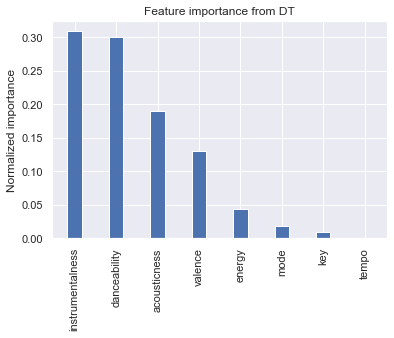

In [12]:
df_imp = getFeatureImportances(df, 8)
df_imp

It seems that overall, instrumentalness, danceability, acousticness, valence, and energy are the most important features when predicting the mood of a song.

Now let's analyze the feature importances by mood.

And now we calculate the feature importances for the four different moods.

In [13]:
def getFeatureImportancesByClass(df_orig, top_num, className, includeSamples=False):
    df_class = df_orig.copy()
    df_class[label] = np.where(df_class[label] == className, className, "not " + className)
    return getFeatureImportances(df_class, top_num)

### Angry Feature Importances

The best params for the model is : {'max_depth': 5, 'min_samples_leaf': 43}
Recall for the best model is : 0.77


,name,imp
0,acousticness,0.601216
3,instrumentalness,0.378204
4,key,0.016960
7,valence,0.003620
1,danceability,0.000000
2,energy,0.000000
5,mode,0.000000
6,tempo,0.000000


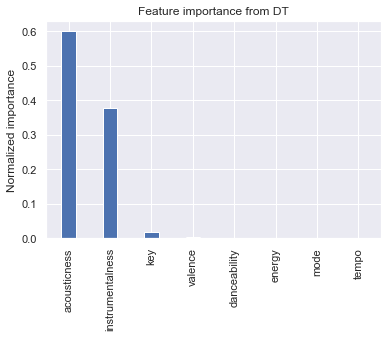

In [14]:
df_imp = getFeatureImportancesByClass(df, 8, "angry")
df_imp

### Neutral Feature Importances

The best params for the model is : {'max_depth': 5, 'min_samples_leaf': 32}
Recall for the best model is : 0.79


,name,imp
3,instrumentalness,0.728142
1,danceability,0.148093
7,valence,0.081384
6,tempo,0.035921
2,energy,0.006460
0,acousticness,0.000000
4,key,0.000000
5,mode,0.000000


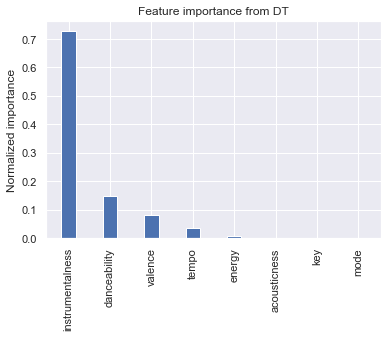

In [15]:
getFeatureImportancesByClass(df, 8, "neutral")

### Happy Feature Importances

The best params for the model is : {'max_depth': 5, 'min_samples_leaf': 26}
Recall for the best model is : 0.79


,name,imp
7,valence,0.812921
1,danceability,0.162031
2,energy,0.017676
0,acousticness,0.007372
3,instrumentalness,0.000000
4,key,0.000000
5,mode,0.000000
6,tempo,0.000000


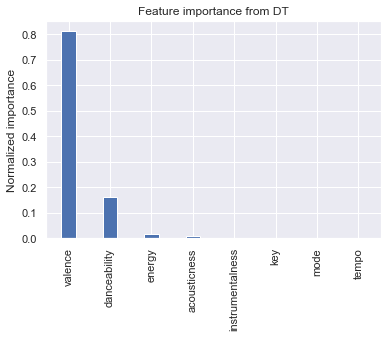

In [16]:
getFeatureImportancesByClass(df, 8, "happy")

### Sad Feature Importances

The best params for the model is : {'max_depth': 5, 'min_samples_leaf': 35}
Recall for the best model is : 0.83


,name,imp
0,acousticness,0.682347
1,danceability,0.235537
7,valence,0.078845
6,tempo,0.003272
2,energy,0.000000
3,instrumentalness,0.000000
4,key,0.000000
5,mode,0.000000


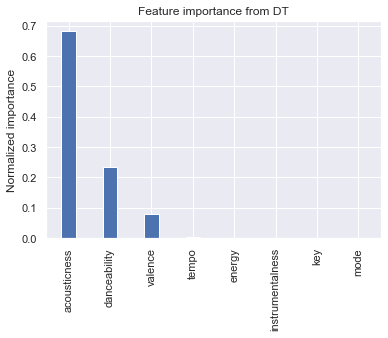

In [17]:
getFeatureImportancesByClass(df, 8, "sad")

## Final Results

Picking out the most important features for each mood and using the average (median) values for those features, we can summarize our findings as the following. (Unimportant features were ommited from the table.)

| Feature | Angry | Neutral | Happy | Sad |
| --- | --- | --- | --- | --- |
| acousticness | 0.0609 |  |  | 0.3070 |
| instrumentalness | 0 | 0.0173 |  |  |
| danceability |  | 0.691 | 0.6525 | 0.5035 |
| valence |  | 0.3270 | 0.6895 | 0.3070
| tempo | | 116 | | |

# Additional Data Analysis

We were having difficulty getting reliable song recommendations for the "angry" mood, so we decided to do further data analysis to find maximum and minimum limits on the feature values as well. The distribution of the features for the "angry" mood are shown below.

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

In [19]:
def plotHisto(mood, feature):
    x = df[df[label] == mood][feature]
    plt.hist(x, bins=50)
    plt.gca().set(title=feature, ylabel=mood);

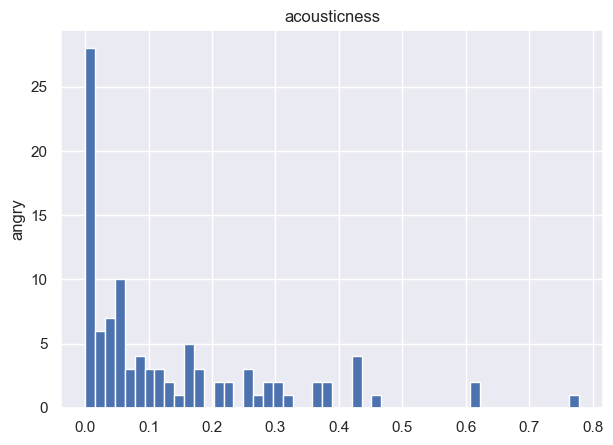

In [20]:
plotHisto("angry", "acousticness")

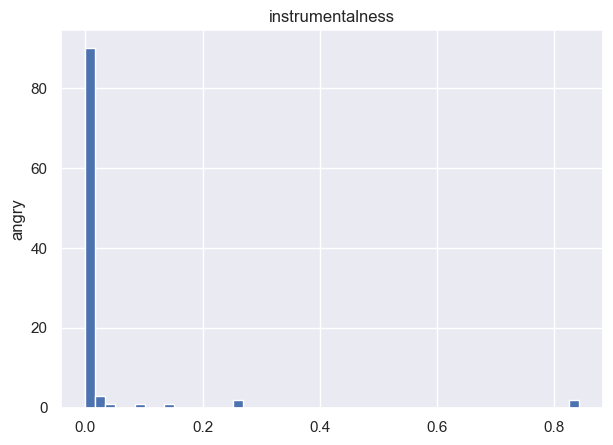

In [21]:
plotHisto("angry", "instrumentalness")

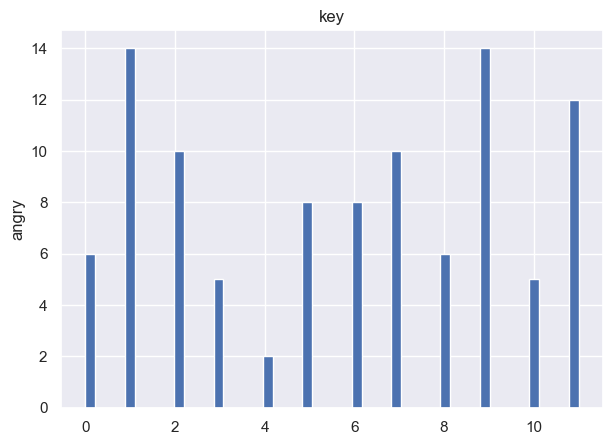

In [22]:
plotHisto("angry", "key")

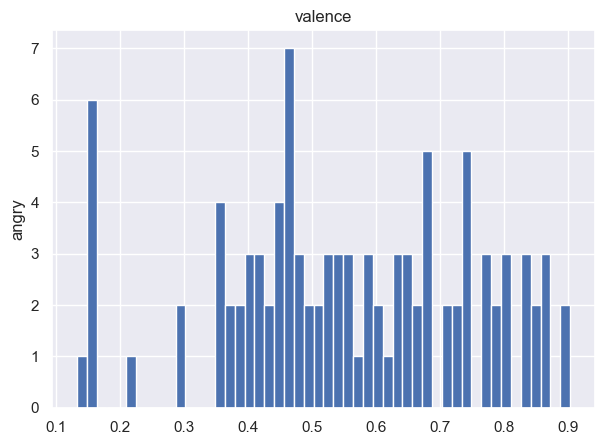

In [23]:
plotHisto("angry", "valence")

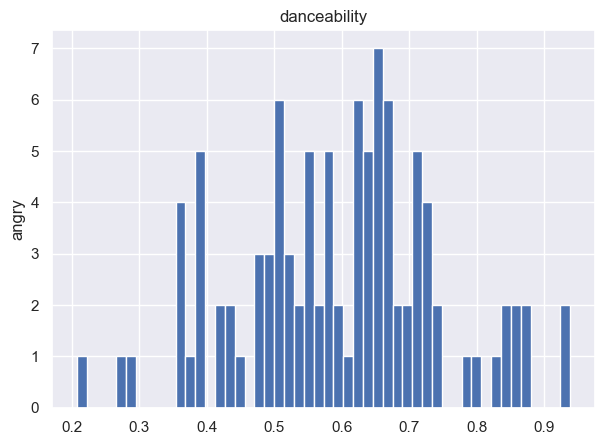

In [24]:
plotHisto("angry", "danceability")

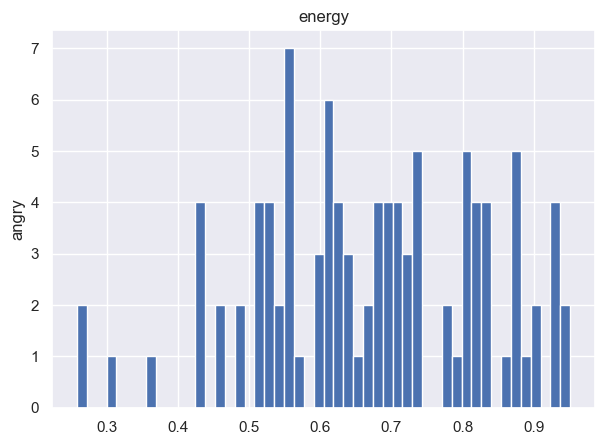

In [25]:
plotHisto("angry", "energy")

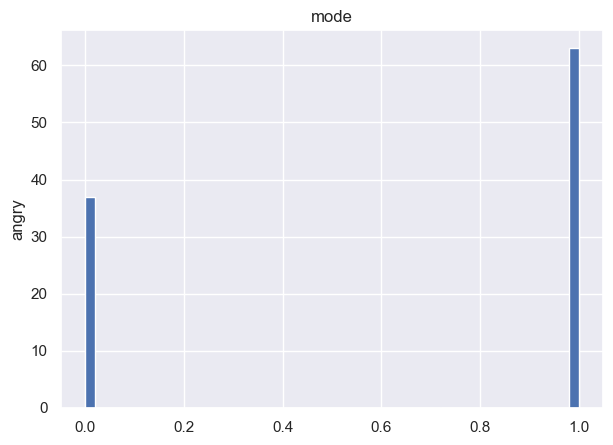

In [26]:
plotHisto("angry", "mode")

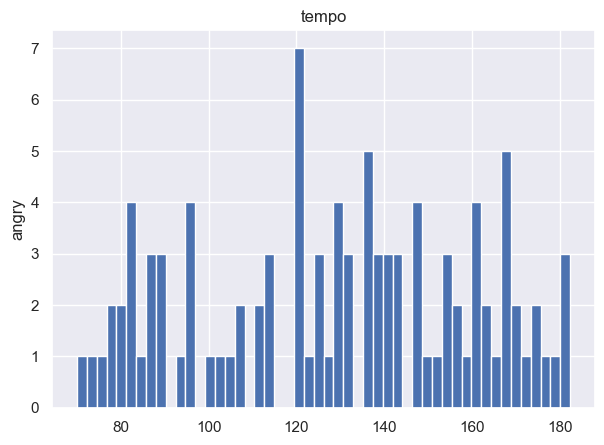

In [27]:
plotHisto("angry", "tempo")

# Model Training and Evalutation

After testing multiple models, a Random Forest Regressor performed best. The training and tuning of hyperparameters are shown below.

In [28]:
# Create labeled examples
y = df[label]
X = df.drop(columns=[label, 'tempo', 'key', 'mode', 'energy'], axis=1)

# Split examples into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

The following cell may take a few minutes to run -- feel free to skip this cell when running and use the parameters in the second cell below.

In [29]:
rfc=RandomForestClassifier(random_state=123)
param_grid = { 
    'n_estimators': [70, 80, 90, 100, 110, 120],
    #'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,3,4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 3)
CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 100}

In [30]:
#Train best model
rf_model=RandomForestClassifier(max_depth=5, n_estimators=100, random_state=123)
rf_model.fit(X_train, y_train)

#Evaluate best model
rf_pred = rf_model.predict(X_test)
rf_acc = accuracy_score(rf_pred, y_test)
print('[RF] Accuracy Score: {0}'.format(rf_acc))

[RF] Accuracy Score: 0.6484375
